### Tensor simple operations

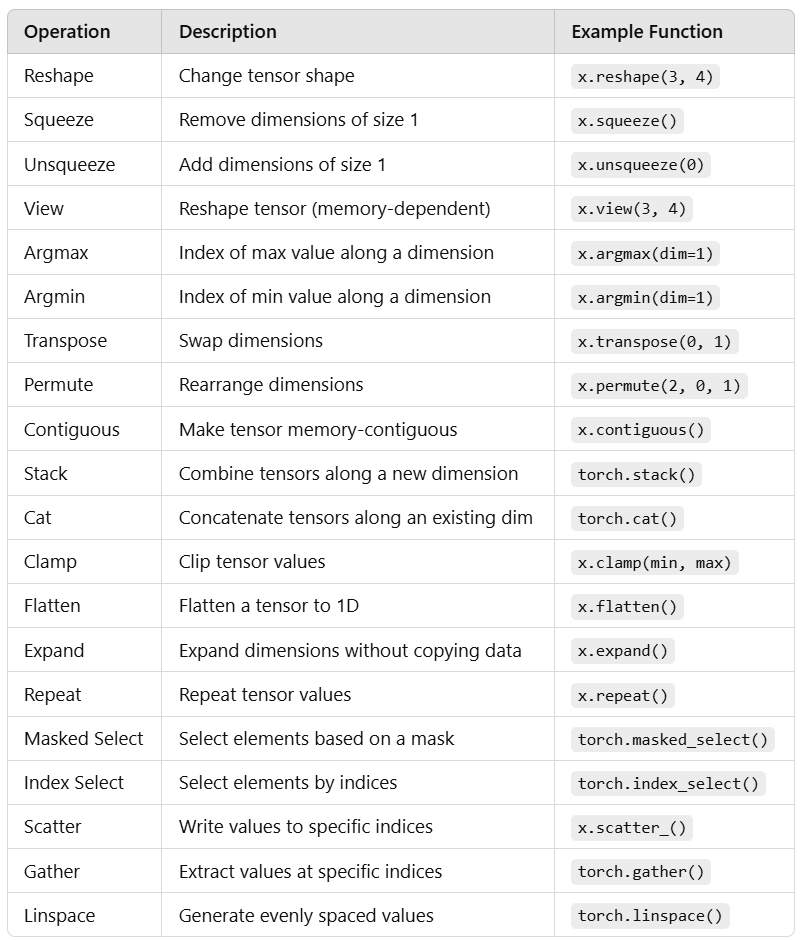

### 1. Reshape
Changes the shape of a tensor without changing its data.

In [ ]:
import torch
x=torch.arange(12).reshape(3,4)

print(x)

### 2. Squeeze
Removes dimensions of size 1.

In [ ]:
x = torch.tensor([[[5.0]]])  # Shape: (1, 1, 1)
print(x.squeeze())  # Shape: ()

3. Unsqueeze

Adds a dimension of size 1 at the specified position.

In [ ]:
x = torch.tensor([5.0])  # Shape: (1,)
print(x.unsqueeze(0))  # Shape: (1, 1)

4. View

An alternative to reshape, but it requires the tensor to be contiguous in memory.

In [ ]:
x = torch.arange(12)
print(x.view(3, 4))  # Shape: (3, 4)

5. Argmax

Returns the index of the maximum value along a specified dimension.

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x.argmax(dim=1))  # Index of max in each row

### 6. Argmin

Returns the index of the minimum value along a specified dimension.

In [ ]:
print(x.argmin(dim=1))  # Index of min in each row

### 7. Transpose

Swaps two dimensions of a tensor.

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
print(x.transpose(0, 1))  # Swaps rows and columns

### 8. Permute

Rearranges dimensions of a tensor.

In [ ]:
x = torch.randn(2, 3, 4)
print(x.shape)
print()
print(x.permute(2, 0, 1))  # Rearranges dimensions
print(x.permute(2, 0, 1).shape)

### 9. Contiguous
Ensures a tensor is stored in contiguous memory for operations like view.

In [ ]:
x = x.permute(1, 0, 2).contiguous()
print(x)
print(x.shape)

### 10. Stack
Combines multiple tensors along a new dimension.

In [ ]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
print(torch.stack((x, y), dim=0))  # Shape: (2, 2)


### 11. Cat

Concatenates tensors along an existing dimension.

In [ ]:
print(torch.cat((x.unsqueeze(0), y.unsqueeze(0)), dim=0))  # Shape: (2, 2)

### 12. Clamp

Clips tensor values to a specified range.

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])
print(x.clamp(1.5, 2.5))  # Values clipped between 1.5 and 2.5

### 13. Flatten

Flattens a tensor into a 1D tensor or along specified dimensions.

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
print(x.flatten())  # Shape: (4,)

### 14. Expand
Expands a tensor's dimensions without copying data.

In [ ]:
x = torch.tensor([1, 2, 3])
print(x.unsqueeze(0).expand(2, 3))  # Shape: (2, 3)

### 15. Repeat

Repeats the tensor along specified dimensions.

In [ ]:
print(x.repeat(2, 1))  # Shape: (2, 3)

### 16. Masked Select

Selects elements based on a boolean mask.

In [ ]:
x = torch.tensor([1, 2, 3, 4])
mask = x > 2
print(torch.masked_select(x, mask))  # Output: [3, 4]

### 17. Index Select

Selects elements along a specified dimension using indices.

In [ ]:
indices = torch.tensor([0, 2])
print(torch.index_select(x, dim=0, index=indices))  # Output: [1, 3]

### 18. Scatter

Writes values to a tensor at specified indices.

In [ ]:
# Define the base tensor
x = torch.zeros(3, 5, dtype=torch.float)  # Shape: (3, 5)

# Define indices (valid indices for dimension 1)
indices = torch.tensor([[0, 1, 2], [0, 1, 3], [0, 2, 4]])  # Indices must be < x.size(1)

# Define values (should match the shape of indices)
values = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float)  # Shape: (3, 3)

# Perform scatter operation
x.scatter_(1, indices, values)
print(x)


### 19. Gather

Gathers values along a specified dimension.

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
indices = torch.tensor([[0, 1], [1, 0]])
print(torch.gather(x, dim=1, index=indices))

### 20. Linspace
Creates a tensor with evenly spaced values.

In [ ]:
print(torch.linspace(0, 10, steps=5))  # [0, 2.5, 5, 7.5, 10]

### Basic Neural Network using Pytorch

In [ ]:
# Input Layer (2 nodes)
#         |
#         v
# Hidden Layer (4 nodes)
#         |
#         v
# Output Layer (1 node with sigmoid activation)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Sample data
X = torch.rand((100, 2))  # 100 samples with 2 features
y = torch.randint(0, 2, (100,))  # Binary labels (0 or 1)

y

In [ ]:
# Prepare dataset
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

dataloader

In [ ]:
# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Input size 2, hidden size 4
        self.fc2 = nn.Linear(4, 1)  # Hidden size 4, output size 1
        self.sigmoid = nn.Sigmoid()  # Output activation

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = self.sigmoid(self.fc2(x))  # Sigmoid activation
        return x

In [ ]:
# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:


# Training loop
for epoch in range(20):
    for batch_X, batch_y in dataloader:
        batch_y = batch_y.float().unsqueeze(1)  # Reshape y for BCELoss
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

In [ ]:
# Testing the model
with torch.no_grad():
    test_X = torch.rand((10, 2))  # 10 test samples
    predictions = model(test_X)
    print("Predictions:", predictions)

Tokenization and Embeddings

In [ ]:
import torch
import torch.nn as nn

# Example sentences
sentences = ["I love PyTorch", "PyTorch is powerful"]

# Simple word-to-index mapping for tokenization
word_to_ix = {"I": 0, "love": 1, "PyTorch": 2, "is": 3, "powerful": 4}

In [ ]:
vocab_size = len(word_to_ix)
embedding_dim = 8

In [ ]:
# Tokenize sentences
tokenized_sentences = [[word_to_ix[word] for word in sentence.split()] for sentence in sentences]

# Convert to tensor
inputs = torch.tensor(tokenized_sentences, dtype=torch.long)

In [ ]:
inputs

In [ ]:
# Define Embedding Layer
embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

# Forward pass through the embedding layer
embeddings = embedding_layer(inputs)

print("Embedding Vectors for Input Sentences:")
print(embeddings)

In [ ]:
embeddings[:,:,7]

**Recurrent Neural Networks (RNNs)**

RNN Output:

The RNN produces an output tensor of shape **(batch_size, seq_length, hidden_dim)**.
This means it outputs a hidden_dim-sized vector for every time step in the sequence.
Fully Connected (FC) Layer:

The FC layer expects an input of shape **(batch_size * seq_length, hidden_dim)** if we want it to process every time step individually.
Its output size is typically the size of the vocabulary if you're predicting tokens (e.g., next-word prediction).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example dataset: tokenized sentences
sentences = ["I love PyTorch", "PyTorch is amazing"]
word_to_ix = {"I": 0, "love": 1, "PyTorch": 2, "is": 3, "amazing": 4}
vocab_size = len(word_to_ix)
embedding_dim = 8
hidden_dim = 16

# Prepare input and target sequences
tokenized_sentences = [[word_to_ix[word] for word in sentence.split()] for sentence in sentences]

In [ ]:
inputs = torch.tensor([seq[:-1] for seq in tokenized_sentences], dtype=torch.long)  # Input (excluding last word)
targets = torch.tensor([seq[1:] for seq in tokenized_sentences], dtype=torch.long)  # Target (excluding first word)

In [ ]:
# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(SimpleRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim) ### vocab_size, embedding_dim
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True) ### embedding_dim, hidden_dim
        self.fc = nn.Linear(hidden_dim, vocab_size)  # Output size matches vocab size

    def forward(self, x):
        embedded = self.embedding(x)  # Shape: (batch_size, seq_length, embedding_dim)
        output, hidden = self.rnn(embedded)  # Output shape: (batch_size, seq_length, hidden_dim)

        # Reshape for FC layer
        output = output.reshape(-1, hidden_dim)  # Shape: (batch_size * seq_length, hidden_dim)
        output = self.fc(output)  # Shape: (batch_size * seq_length, vocab_size)
        return output, hidden

In [ ]:
# Instantiate the model, loss function, and optimizer
model = SimpleRNN(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Loop through the dataset (mini-batch training can be added if needed)
    for i in range(len(inputs)):
        input_seq = inputs[i].unsqueeze(0)  # Shape: (1, seq_length)
        target_seq = targets[i].unsqueeze(0)  # Shape: (1, seq_length)

        # Forward pass
        predictions,_ = model(input_seq)  # Shape: (1, seq_length, vocab_size)

        # Reshape predictions and targets for loss calculation
        predictions= predictions.view(-1, vocab_size)  # Shape: (seq_length, vocab_size)
        target_seq = target_seq.view(-1)  # Shape: (seq_length)

        # Calculate loss
        loss = criterion(predictions, target_seq)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")


In [ ]:
# Testing the model
test_sentence = "I love"
test_tokens = torch.tensor([[word_to_ix[word] for word in test_sentence.split()]], dtype=torch.long)

with torch.no_grad():
    model.eval()
    predictions,_ = model(test_tokens)
    predicted_indices = torch.argmax(predictions, dim=-1).squeeze().tolist()
    predicted_words = [list(word_to_ix.keys())[idx] for idx in predicted_indices]
    print("Next-word predictions:", predicted_words)

### PyTorch Autograd and Backpropagation


    Input Data (x)   --->   Model Forward Pass   --->   Predictions (ŷ)
                               |                       |
                               v                       |
                          Loss Calculation   <---------+
                               |
                               v
                        Backward Pass (z.backward())
                               |
                               v
                      Gradients Computed (∂L/∂W, ∂L/∂b)
                               |
                               v
                     Optimizer Step (optimizer.step())
                               |
                               v
                     Updated Parameters (W, b)
                               |
                               v
                     Repeat for Multiple Epochs


In [ ]:
import torch

# Define inputs and parameters
x = torch.tensor(2.0, requires_grad=True)  # Input
y = torch.tensor(3.0, requires_grad=True)  # Another input

# Define a function
z = x ** 2 + y ** 3  # z = x^2 + y^3

# Backpropagation
z.backward()

# Gradients
print(f"Gradient of z w.r.t x: {x.grad}")  # dz/dx = 2*x
print(f"Gradient of z w.r.t y: {y.grad}")  # dz/dy = 3*y^2


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple dataset
x = torch.tensor([[1.0], [2.0], [3.0]])  # Features
y = torch.tensor([[2.0], [4.0], [6.0]])  # Targets

# Define a simple linear model
model = nn.Linear(1, 1)  # One input, one output
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)  # Predict
    loss = criterion(predictions, y)  # Compute loss

    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Test the model
with torch.no_grad():
    test_input = torch.tensor([[4.0]])
    test_output = model(test_input)
    print("Prediction for input 4.0:", test_output.item())


### What Are Learning Rate Schedulers?

Purpose:

Adjust the learning rate during training to improve optimization.
Start with a high learning rate for faster convergence and reduce it as training progresses to fine-tune the model.
Types of Schedulers:

1. StepLR: Reduces the learning rate by a factor every few epochs.
2. ExponentialLR: Decays the learning rate exponentially.
3. ReduceLROnPlateau: Adjusts the learning rate based on validation loss.
4. CosineAnnealingLR: Implements cosine annealing to reduce the learning rate smoothly.
5. CyclicLR: Cyclically varies the learning rate within a range.



Experimenting with Other Schedulers
1. ExponentialLR:
Decay the learning rate exponentially.
`scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)`

2. ReduceLROnPlateau:
Reduce the learning rate when the validation loss plateaus.
`scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)`

3. CosineAnnealingLR:
Reduce the learning rate smoothly using a cosine curve.
`scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)`





In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example dataset
x = torch.tensor([[1.0], [2.0], [3.0]])  # Features
y = torch.tensor([[2.0], [4.0], [6.0]])  # Targets

# Define a simple linear model
model = nn.Linear(1, 1)  # One input, one output

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
epochs = 50
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)  # Predict
    loss = criterion(predictions, y)  # Compute loss

    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters

    # Step the scheduler
    scheduler.step()

    if (epoch + 1) % 10 == 0:
        current_lr = scheduler.get_last_lr()[0]
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Learning Rate: {current_lr:.5f}")

# Test the model
with torch.no_grad():
    test_input = torch.tensor([[4.0]])
    test_output = model(test_input)
    print("Prediction for input 4.0:", test_output.item())


### Gradient clipping and managing exploding gradients

### What Are Exploding Gradients?
### Definition:

During backpropagation, gradients can become excessively large, causing the model parameters to grow uncontrollably.

### Impact:
Leads to numerical instability (NaN losses).
Prevents the model from converging.

### Solution:
Gradient Clipping limits the magnitude of gradients during backpropagation.
Techniques for Gradient Clipping

### Clipping by Value:
Sets all gradients to be within a specified range.

### Clipping by Norm:
Scales the gradients so that their total norm does not exceed a predefined threshold.


### When to Use Gradient Clipping

### Training RNNs or LSTMs:
Recurrent architectures are more prone to exploding gradients due to long sequences.

### Large Learning Rates:
Higher learning rates can exacerbate the problem of exploding gradients.

### Debugging Instabilities:
If training becomes unstable (e.g., sudden jumps in loss or NaN values), gradient clipping can stabilize it.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example dataset
x = torch.tensor([[1.0], [2.0], [3.0]])  # Features
y = torch.tensor([[2.0], [4.0], [6.0]])  # Targets

# Define a simple linear model
model = nn.Linear(1, 1)  # One input, one output

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Training loop with gradient clipping
epochs = 50
clip_value = 1.0  # Gradient clipping threshold

for epoch in range(epochs):
    # Forward pass
    predictions = model(x)  # Predict
    loss = criterion(predictions, y)  # Compute loss

    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients

    # Apply gradient clipping
    torch.nn.utils.clip_grad_value_(model.parameters(), clip_value)

    # Update parameters
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

In [ ]:
# Use clip_grad_norm_ instead of clip_grad_value_
clip_norm = 2.0  # Norm threshold

for epoch in range(epochs):
    # Forward pass
    predictions = model(x)  # Predict
    loss = criterion(predictions, y)  # Compute loss

    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients

    # Apply gradient norm clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), clip_norm)

    # Update parameters
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")


# PyTorch Custom Datasets and DataLoaders

Efficiently handling large and complex datasets is crucial in deep learning workflows. PyTorch provides the Dataset and DataLoader classes for this purpose. In this chapter, you'll learn to create custom datasets and use DataLoaders for batching, shuffling, and parallel data loading.

### Key Concepts
### Dataset Class:
Represents a collection of data.
Provides methods to access individual samples (__getitem__) and dataset length (__len__).

### DataLoader Class:
Facilitates batching, shuffling, and parallel data loading.
Efficiently iterates through datasets during training.

### Custom Dataset:
You can create your own dataset by inheriting the torch.utils.data.Dataset class and overriding its methods.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        # Store the data and targets
        self.data = data
        self.targets = targets

    def __len__(self):
        # Return the size of the dataset
        return len(self.data)

    def __getitem__(self, idx):
        # Fetch a single data point and its corresponding target
        return self.data[idx], self.targets[idx]

# Example data
data = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
targets = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0]])

# Instantiate the custom dataset
dataset = CustomDataset(data, targets)

# Define a DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate through the DataLoader
print("Batches:")
for batch in dataloader:
    inputs, targets = batch
    print(f"Inputs: {inputs}, Targets: {targets}")


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple linear model
model = nn.Linear(1, 1)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    for batch in dataloader:
        inputs, targets = batch

        # Forward pass
        predictions = model(inputs)
        loss = criterion(predictions, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Test the model
with torch.no_grad():
    test_input = torch.tensor([[6.0]])
    test_output = model(test_input)
    print("Prediction for input 6.0:", test_output.item())


### Embedding Layers in PyTorch

What is an Embedding Layer?
Definition:

- An embedding layer maps discrete tokens (indices) to dense vectors of fixed size.
- Each token index corresponds to a row in the embedding matrix.


Why Use Embeddings?

- Reduce the dimensionality of input data.
- Learn semantic relationships between tokens (e.g., "king" and "queen" are similar).


Steps to Use an Embedding Layer

Initialize the Embedding Layer:
- Use torch.nn.Embedding(num_embeddings, embedding_dim).
- num_embeddings: Vocabulary size.
- embedding_dim: Dimension of the dense vectors.

Forward Pass:
- Pass token indices to the embedding layer to get their corresponding dense vectors.


In [ ]:
import torch
import torch.nn as nn

# Example vocabulary and tokenized sentences
vocab = {"I": 0, "love": 1, "PyTorch": 2, "<PAD>": 3}
vocab_size = len(vocab)
embedding_dim = 8

# Tokenized and padded sentences
tokenized_sentences = [[0, 1, 2], [2, 3, 3]]  # "I love PyTorch", "PyTorch <PAD> <PAD>"
inputs = torch.tensor(tokenized_sentences, dtype=torch.long)

# Define an embedding layer
embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

# Forward pass through the embedding layer
embedded_sentences = embedding_layer(inputs)

print("Input Tensor:")
print(inputs)
print("\nEmbedding Vectors:")
print(embedded_sentences)
print("\nEmbedding Shape:", embedded_sentences.shape)  # Shape: (batch_size, seq_length, embedding_dim)


In [ ]:
class SimpleNLPModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(SimpleNLPModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)  # RNN layer
        self.fc = nn.Linear(hidden_dim, 1)  # Fully connected layer for binary classification

    def forward(self, x):
        embedded = self.embedding(x)  # Map tokens to embeddings
        rnn_out, _ = self.rnn(embedded)  # Pass through RNN
        output = self.fc(rnn_out[:, -1, :])  # Use the last RNN output for classification
        return output

# Instantiate and test the model
vocab_size = len(vocab)
embedding_dim = 8
hidden_dim = 16
model = SimpleNLPModel(vocab_size, embedding_dim, hidden_dim)

# Forward pass with dummy input
output = model(inputs)
print("\nModel Output:", output)

### Binary Classification with LSTM Using a Hugging Face Dataset

In [ ]:
!pip install torch datasets

### Load a Hugging Face Dataset

In [ ]:
from datasets import load_dataset

dataset=load_dataset("imdb")

train_data=dataset['train'].shuffle(seed=42).select(range(1000))
test_data=dataset['test'].shuffle(seed=42).select(range(1000))

### Preprocessing
Tokenize the text, build a vocabulary, and pad the sequences.

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch
import re


### Simple Tokenizer
def tokenize(text):
  text=re.sub(r"[^\w\s]", "", text.lower())
  return text.split()

tokenize("Pytorch binary tokenizer")

In [ ]:
### Build Vocabulary
def build_vocab(dataset):
  vocab={"<PAD>": 0, "<UNK>":1}

  for example in dataset:
    for word in tokenize(example['text']):
      if word not in vocab:
        vocab[word]=len(vocab)
  return vocab

### Encode text using the vocabulary
def encode(text,vocab):
  return [vocab.get(word, vocab['<UNK>']) for word in tokenize(text)]

### Build Vocabulary
vocab=build_vocab(train_data)
vocab

In [ ]:
# Custom PyTorch dataset
class IMDbDataset(Dataset):
    def __init__(self, data, vocab, max_length=100):
        self.data = data
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data[idx]["text"]
        label = self.data[idx]["label"]
        encoded_text = encode(text, self.vocab)
        padded_text = encoded_text[: self.max_length] + [self.vocab["<PAD>"]] * max(0, self.max_length - len(encoded_text))
        return torch.tensor(padded_text, dtype=torch.long), torch.tensor(label, dtype=torch.float)

# Create datasets and dataloaders
train_dataset = IMDbDataset(train_data, vocab)
test_dataset = IMDbDataset(test_data, vocab)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

### Define the LSTM Model

In [ ]:
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        hidden_state = lstm_out[:, -1, :]  # Take the last hidden state
        output = self.fc(hidden_state)
        return self.sigmoid(output)


### Train the Model

In [ ]:
# Hyperparameters
embedding_dim = 128
hidden_dim = 64
num_epochs = 5
learning_rate = 0.001

# Model, loss, and optimizer
model = LSTMClassifier(vocab_size=len(vocab), embedding_dim=embedding_dim, hidden_dim=hidden_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        labels = labels.unsqueeze(1)  # Match the output shape
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")


### Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = (outputs > 0.5).float()  # Convert probabilities to binary predictions
        all_preds.extend(preds.squeeze().tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")


### Binary Classification Using Transformer Encoders in PyTorch

Load and Preprocess the Dataset
- Hugging Face datasets library and prepare tokenized inputs for a Transformer Encoder.

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load the IMDb dataset
dataset = load_dataset("imdb")

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data
def preprocess_data(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
train_data = dataset["train"].shuffle(seed=42).select(range(1000)).map(preprocess_data, batched=True)
test_data = dataset["test"].shuffle(seed=42).select(range(200)).map(preprocess_data, batched=True)

# Keep only input_ids and attention_mask for training
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

 ### Create a DataLoader

In [ ]:
from torch.utils.data import DataLoader

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16)

### Transformer Encoder Model
- Transformer Encoder architecture with pre-trained embeddings for classification.

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel

class TransformerClassifier(nn.Module):
    def __init__(self, transformer_model_name, hidden_dim):
        super(TransformerClassifier, self).__init__()
        self.encoder = AutoModel.from_pretrained(transformer_model_name)  # Pre-trained Transformer
        self.fc = nn.Linear(self.encoder.config.hidden_size, hidden_dim)  # Additional FC layer
        self.output = nn.Linear(hidden_dim, 1)  # Output layer for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # Use the pooled output from [CLS] token
        hidden = torch.relu(self.fc(pooled_output))
        return self.sigmoid(self.output(hidden))

### Train the Model

In [ ]:
# Hyperparameters
transformer_model_name = "bert-base-uncased"
hidden_dim = 128
num_epochs = 3
learning_rate = 2e-5

# Initialize model, loss, and optimizer
model = TransformerClassifier(transformer_model_name, hidden_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device).unsqueeze(1).float()

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")

### Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask)
        preds = (outputs > 0.5).float().cpu()
        all_preds.extend(preds.squeeze().tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

### Binary Classification Using Transformer Decoders in PyTorch

Transformer Decoders are powerful architectures commonly used in text generation tasks, but they can also be adapted for classification. In this chapter, we'll use a Transformer Decoder for binary classification with a Hugging Face dataset.

Load and Preprocess the Dataset:
- Using the imdb dataset from Hugging Face and tokenize it for a Transformer Decoder.

In [ ]:
# Import required libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM

# Hyperparameters
transformer_model_name = "gpt2"
hidden_dim = 128
num_epochs = 3
learning_rate = 2e-5
batch_size = 16
max_length = 128

# Load and preprocess dataset
dataset = load_dataset("imdb")

# Tokenizer setup
tokenizer = AutoTokenizer.from_pretrained(transformer_model_name)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # Add a padding token
tokenizer.padding_side = "left"  # GPT-2 works better with left-padding

# Tokenize the dataset
def preprocess_data(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=max_length
    )

# Apply tokenization and format data
train_data = dataset["train"].shuffle(seed=42).select(range(1000)).map(preprocess_data, batched=True)
test_data = dataset["test"].shuffle(seed=42).select(range(200)).map(preprocess_data, batched=True)
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# DataLoader setup
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Transformer Decoder Classifier
class TransformerDecoderClassifier(nn.Module):
    def __init__(self, transformer_model_name, hidden_dim):
        super(TransformerDecoderClassifier, self).__init__()
        self.decoder = AutoModelForCausalLM.from_pretrained(transformer_model_name)  # GPT-2
        self.fc = nn.Linear(self.decoder.config.n_embd, hidden_dim)  # FC layer
        self.output = nn.Linear(hidden_dim, 1)  # Output layer for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        decoder_outputs = self.decoder(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
        hidden_states = decoder_outputs.hidden_states[-1]  # Last hidden states
        pooled_output = hidden_states[:, 0, :]  # Use the first token ([CLS]-equivalent in GPT-2)
        hidden = torch.relu(self.fc(pooled_output))
        return self.sigmoid(self.output(hidden))

# Initialize model, loss, and optimizer
model = TransformerDecoderClassifier(transformer_model_name, hidden_dim)
model.decoder.resize_token_embeddings(len(tokenizer))  # Resize embeddings for added [PAD] token
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device).unsqueeze(1).float()

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")

# Evaluation loop
from sklearn.metrics import accuracy_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask)
        preds = (outputs > 0.5).float().cpu()
        all_preds.extend(preds.squeeze().tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")
